**<h1 style="text-align: center;">Exploratory Data Analysis (EDA) on Latest Spotify Streams</h1>**

<p style="text-align: center;">This dataset presents the top songs currently trending for over 70 countries.

<p style="text-align: center;">Top 50 songs for each country is updated daily to provide the most up-to-date information on the popularity of songs in the world.

**<h2>Tasks to implement:</h2>**

* Observe the trend in popularity of artists over time
* Identify the most charted artists on Spotify(considering artists who have appeared in the charts more than 5000 times).
* Investigate whether there is a correlation between song popularity and its danceability or energy level.
* Explore the relationship between the explicitness of songs and their popularity.
* Analyze the relationship between song features (such as acousticness or instrumentalness) and their popularity.
* Compare the top artists in different countries to identify cultural music preferences.

**<h3>STEP 0: Importing and Reading Data</h3>**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("C:\\Users\\Risshi\\Downloads\\universal_top_spotify_songs.csv\\universal_top_spotify_songs.csv")

**<h3>STEP 1: Understanding Data</h3>**

In [4]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,1,0,1,NaN,2024-07-16,99,False,210373,HIT ME HARD AND SOFT,2024-05-17,0.747,0.507,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,4
1,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,2,0,-1,NaN,2024-07-16,99,True,175459,Espresso,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4
2,5N3hjp1WNayUPZrA8kJmJP,Please Please Please,Sabrina Carpenter,3,0,0,NaN,2024-07-16,98,True,186365,Please Please Please,2024-06-06,0.669,0.586,9,-6.073,1,0.0540,0.2740,0.000000,0.1040,0.579,107.071,4
3,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,4,0,0,NaN,2024-07-16,97,True,274192,Not Like Us,2024-05-04,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,4
4,6XjDF6nds4DE2BBbagZol6,Gata Only,"FloyyMenor, Cris Mj",5,0,0,NaN,2024-07-16,96,True,222000,Gata Only,2024-02-02,0.791,0.499,8,-8.472,0,0.0509,0.4460,0.000024,0.0899,0.669,99.986,4


In [5]:
df.tail()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
982348,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,310490,For All The Dogs,2023-10-06,0.483,0.408,5,-9.243,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3
982349,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,173253,SET IT OFF,2023-10-13,0.773,0.635,10,-5.060,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4
982350,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,184791,People,2022-12-06,0.573,0.422,10,-7.621,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5
982351,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,179560,Layover,2023-08-11,0.633,0.454,9,-8.016,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4
982352,59NraMJsLaMCVtwXTSia8i,Prada,"cassö, RAYE, D-Block Europe",50,0,0,AE,2023-10-18,94,True,132359,Prada,2023-08-11,0.638,0.717,8,-5.804,1,0.0375,0.0010,0.000002,0.113,0.422,141.904,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982353 entries, 0 to 982352
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          982353 non-null  object 
 1   name                982326 non-null  object 
 2   artists             982326 non-null  object 
 3   daily_rank          982353 non-null  int64  
 4   daily_movement      982353 non-null  int64  
 5   weekly_movement     982353 non-null  int64  
 6   country             969046 non-null  object 
 7   snapshot_date       982353 non-null  object 
 8   popularity          982353 non-null  int64  
 9   is_explicit         982353 non-null  bool   
 10  duration_ms         982353 non-null  int64  
 11  album_name          981861 non-null  object 
 12  album_release_date  981990 non-null  object 
 13  danceability        982353 non-null  float64
 14  energy              982353 non-null  float64
 15  key                 982353 non-nul

In [7]:
df.shape

(982353, 25)

In [8]:
df.dtypes

spotify_id             object
name                   object
artists                object
daily_rank              int64
daily_movement          int64
weekly_movement         int64
country                object
snapshot_date          object
popularity              int64
is_explicit              bool
duration_ms             int64
album_name             object
album_release_date     object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
dtype: object

In [9]:
df.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000,982353.000000
mean,25.488344,0.823212,2.693506,76.836069,193102.184773,0.684609,0.650237,5.494321,-6.477175,0.540365,0.096341,0.273270,0.017524,0.171786,0.545008,122.483576,3.900830
std,14.428098,6.819784,12.113255,16.076859,50728.418575,0.137981,0.163620,3.558774,2.621957,0.498368,0.090877,0.251142,0.094186,0.125550,0.229017,28.237694,0.419066
min,1.000000,-49.000000,-49.000000,0.000000,0.000000,0.000000,0.000020,0.000000,-37.334000,0.000000,0.000000,0.000008,0.000000,0.013900,0.000000,0.000000,0.000000
25%,13.000000,-1.000000,-3.000000,66.000000,160535.000000,0.594000,0.549000,2.000000,-7.820000,0.000000,0.040000,0.069300,0.000000,0.096100,0.366000,99.993000,4.000000
50%,25.000000,0.000000,0.000000,81.000000,185552.000000,0.703000,0.670000,6.000000,-6.020000,1.000000,0.058700,0.183000,0.000001,0.119000,0.543000,119.984000,4.000000
75%,38.000000,2.000000,5.000000,89.000000,218051.000000,0.788000,0.764000,9.000000,-4.772000,1.000000,0.112000,0.434000,0.000075,0.211000,0.729000,141.071000,4.000000
max,50.000000,49.000000,49.000000,100.000000,939666.000000,0.988000,0.998000,11.000000,3.233000,1.000000,0.921000,0.996000,0.974000,0.978000,0.992000,227.895000,5.000000


In [10]:
df.describe(include = ['object'])

,spotify_id,name,artists,country,snapshot_date,album_name,album_release_date
count,982353,982326,982326,969046,982353,981861,981990
unique,13010,11908,7995,72,271,8977,1971
top,3rUGC1vUpkDG9CZFHMur1t,greedy,Taylor Swift,DO,2024-03-16,nadie sabe lo que va a pasar mañana,2023-10-13
freq,8362,8362,17002,13575,3942,15667,22257


**<h3>STEP 2: Preparing Data</h3>**
* Dropping irrelevant columns and rows 
* Renaming columns
* Changing to accurate datatypes (such as album_release_date, etc.)

In [11]:
df = df[[#'spotify_id', 
    'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', #'snapshot_date', 
       'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']].copy()
df

,name,artists,daily_rank,daily_movement,weekly_movement,country,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,BIRDS OF A FEATHER,Billie Eilish,1,0,1,NaN,99,False,210373,HIT ME HARD AND SOFT,2024-05-17,0.747,0.507,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,4
1,Espresso,Sabrina Carpenter,2,0,-1,NaN,99,True,175459,Espresso,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4
2,Please Please Please,Sabrina Carpenter,3,0,0,NaN,98,True,186365,Please Please Please,2024-06-06,0.669,0.586,9,-6.073,1,0.0540,0.2740,0.000000,0.1040,0.579,107.071,4
3,Not Like Us,Kendrick Lamar,4,0,0,NaN,97,True,274192,Not Like Us,2024-05-04,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,4
4,Gata Only,"FloyyMenor, Cris Mj",5,0,0,NaN,96,True,222000,Gata Only,2024-02-02,0.791,0.499,8,-8.472,0,0.0509,0.4460,0.000024,0.0899,0.669,99.986,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982348,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,84,True,310490,For All The Dogs,2023-10-06,0.483,0.408,5,-9.243,0,0.0502,0.5080,0.000000,0.2590,0.105,88.880,3
982349,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,80,True,173253,SET IT OFF,2023-10-13,0.773,0.635,10,-5.060,1,0.0452,0.0585,0.000000,0.1320,0.476,121.879,4
982350,People,Libianca,48,2,0,AE,88,False,184791,People,2022-12-06,0.573,0.422,10,-7.621,0,0.0678,0.5510,0.000013,0.1020,0.693,124.357,5
982351,Rainy Days,V,49,1,0,AE,88,False,179560,Layover,2023-08-11,0.633,0.454,9,-8.016,0,0.0875,0.7390,0.000000,0.1480,0.282,74.828,4


In [12]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

In [13]:
df = df.rename(columns={'name':'Name',
                    'artists':'Artists', 
                    'daily_rank':'Daily_Rank', 
                    'daily_movement':'Daily_Movement', 
                    'weekly_movement':'Weekly_Movement',
                    'country':'Country', 
                    'popularity':'Popularity', 
                    'is_explicit':'Explicit', 
                    'duration_ms':'Duration(ms)', 
                    'album_name':'Album_Name',
                    'album_release_date':'Album_Release_Date', 
                    'danceability':'Danceability', 
                    'energy':'Energy', 
                    'key':'Key', 
                    'loudness':'Loudness',
                    'mode':'Mode', 
                    'speechiness':'Speechiness', 
                    'acousticness':'Acousticness', 
                    'instrumentalness':'Instrumentalness', 
                    'liveness':'Liveness',
                    'valence':'Valence', 
                    'tempo':'Tempo(bpm)', 
                    'time_signature':'Time_Signature'}).copy()
df

,Name,Artists,Daily_Rank,Daily_Movement,Weekly_Movement,Country,Popularity,Explicit,Duration(ms),Album_Name,Album_Release_Date,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo(bpm),Time_Signature
0,BIRDS OF A FEATHER,Billie Eilish,1,0,1,NaN,99,False,210373,HIT ME HARD AND SOFT,2024-05-17,0.747,0.507,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,4
1,Espresso,Sabrina Carpenter,2,0,-1,NaN,99,True,175459,Espresso,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4
2,Please Please Please,Sabrina Carpenter,3,0,0,NaN,98,True,186365,Please Please Please,2024-06-06,0.669,0.586,9,-6.073,1,0.0540,0.2740,0.000000,0.1040,0.579,107.071,4
3,Not Like Us,Kendrick Lamar,4,0,0,NaN,97,True,274192,Not Like Us,2024-05-04,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,4
4,Gata Only,"FloyyMenor, Cris Mj",5,0,0,NaN,96,True,222000,Gata Only,2024-02-02,0.791,0.499,8,-8.472,0,0.0509,0.4460,0.000024,0.0899,0.669,99.986,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982348,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,84,True,310490,For All The Dogs,2023-10-06,0.483,0.408,5,-9.243,0,0.0502,0.5080,0.000000,0.2590,0.105,88.880,3
982349,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,80,True,173253,SET IT OFF,2023-10-13,0.773,0.635,10,-5.060,1,0.0452,0.0585,0.000000,0.1320,0.476,121.879,4
982350,People,Libianca,48,2,0,AE,88,False,184791,People,2022-12-06,0.573,0.422,10,-7.621,0,0.0678,0.5510,0.000013,0.1020,0.693,124.357,5
982351,Rainy Days,V,49,1,0,AE,88,False,179560,Layover,2023-08-11,0.633,0.454,9,-8.016,0,0.0875,0.7390,0.000000,0.1480,0.282,74.828,4


**Dropping all null records:**

In [15]:
df.isna().sum()

Name                     27
Artists                  27
Daily_Rank                0
Daily_Movement            0
Weekly_Movement           0
Country               13307
Popularity                0
Explicit                  0
Duration(ms)              0
Album_Name              492
Album_Release_Date      363
Danceability              0
Energy                    0
Key                       0
Loudness                  0
Mode                      0
Speechiness               0
Acousticness              0
Instrumentalness          0
Liveness                  0
Valence                   0
Tempo(bpm)                0
Time_Signature            0
dtype: int64

**<p style="text-align: center;">Since these records are <<10% of the dataset, it will have negligible effect on accuracy during analysis**

In [16]:
df = df.dropna(subset=['Name','Artists','Country','Album_Name','Album_Release_Date']) \
    .reset_index(drop=True) \
    .copy()
df

,Name,Artists,Daily_Rank,Daily_Movement,Weekly_Movement,Country,Popularity,Explicit,Duration(ms),Album_Name,Album_Release_Date,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo(bpm),Time_Signature
0,Not Like Us,Kendrick Lamar,1,0,0,ZA,97,True,274192,Not Like Us,2024-05-04,0.898,0.472,1,-7.001,1,0.0776,0.01070,0.000000,0.1410,0.214,101.061,4
1,Yebo Lapho (Gogo) (feat. DJ Maphorisa & Djy Biza),"Felo Le Tee, Scotts Maphuma, Thabza Tee, DJ Ma...",2,0,0,ZA,58,False,424800,Yebo Lapho (Gogo) (feat. DJ Maphorisa & Djy Biza),2024-07-03,0.831,0.933,1,-7.137,1,0.0430,0.00132,0.011500,0.0577,0.608,113.000,4
2,BIRDS OF A FEATHER,Billie Eilish,3,4,11,ZA,99,False,210373,HIT ME HARD AND SOFT,2024-05-17,0.747,0.507,2,-10.171,1,0.0358,0.20000,0.060800,0.1170,0.438,104.978,4
3,Ngathi Nguye,"Umafikizolo, Umashotana",4,-1,1,ZA,59,False,383425,Ngathi Nguye,2024-06-01,0.571,0.722,7,-9.790,1,0.0468,0.13200,0.143000,0.6270,0.726,77.000,4
4,Kwelanga 2.0 (feat. Tman Xpress & LeeMcKrazy),"Bassie, M-Touch, Ranger, Amaza, LeeMcKrazy, Tm...",5,0,6,ZA,58,False,441894,Kwelanga,2024-06-07,0.790,0.662,10,-11.636,0,0.0495,0.07270,0.109000,0.0261,0.678,113.006,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968552,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,84,True,310490,For All The Dogs,2023-10-06,0.483,0.408,5,-9.243,0,0.0502,0.50800,0.000000,0.2590,0.105,88.880,3
968553,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,80,True,173253,SET IT OFF,2023-10-13,0.773,0.635,10,-5.060,1,0.0452,0.05850,0.000000,0.1320,0.476,121.879,4
968554,People,Libianca,48,2,0,AE,88,False,184791,People,2022-12-06,0.573,0.422,10,-7.621,0,0.0678,0.55100,0.000013,0.1020,0.693,124.357,5
968555,Rainy Days,V,49,1,0,AE,88,False,179560,Layover,2023-08-11,0.633,0.454,9,-8.016,0,0.0875,0.73900,0.000000,0.1480,0.282,74.828,4


**<h3>STEP 3: Analysing data based on given tasks</h3>**

**<h5>1. Observe the trend in popularity of artists over time**

In [17]:
# Enter the artist name below
artist = input("Please enter the artist name: ")

artist_data = df[df['Artists'] == artist]

if artist_data.empty:
    print(f"No data available for artist: {artist}")

else:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=artist_data, x='Album_Release_Date', y='Popularity', marker='o')
    plt.title(f'Popularity Trend of {artist} over time')
    plt.xlabel('Album Release Date')
    plt.ylabel('Popularity')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

No data available for artist: 


**<h5>2. Identify the most charted artists on Spotify (considering artists who have appeared in the charts more than 5000 times)**

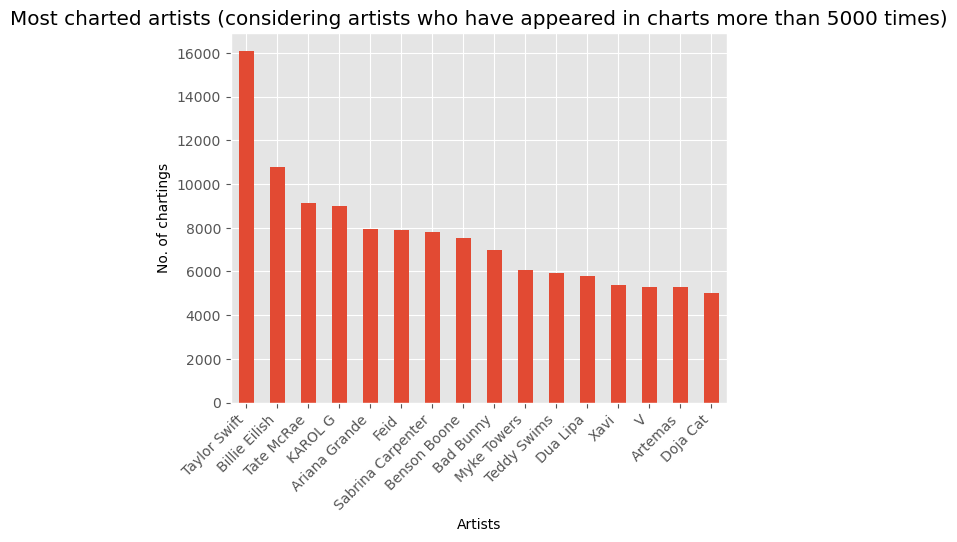

In [18]:
artists = df['Artists'].value_counts()
artist_count = artists[artists > 5000]
artist_count.plot(kind='bar', title='Most charted artists (considering artists who have appeared in charts more than 5000 times)')
plt.xlabel('Artists')
plt.ylabel('No. of chartings')
plt.xticks(rotation=45, ha = 'right')
plt.show()

**<p style="text-align: center;">As we can clearly see from the plot above, Taylor Swift is the most charted artist, appearing a little over 16k times followed by Billie Eilish and Tate McRae.**

**<h5>3. Investigate whether there is a correlation between song popularity and its danceability or energy level.**


In [19]:
df_corr = df[['Popularity','Danceability','Energy']].corr()
df_corr

,Popularity,Danceability,Energy
Popularity,1.000000,-0.014830,0.027952
Danceability,-0.014830,1.000000,0.236999
Energy,0.027952,0.236999,1.000000


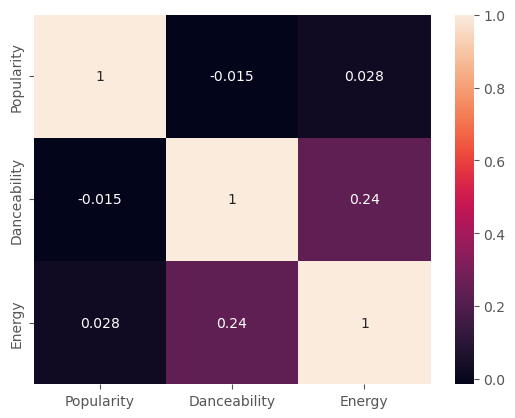

In [20]:
sns.heatmap(df_corr, annot=True)
plt.show()

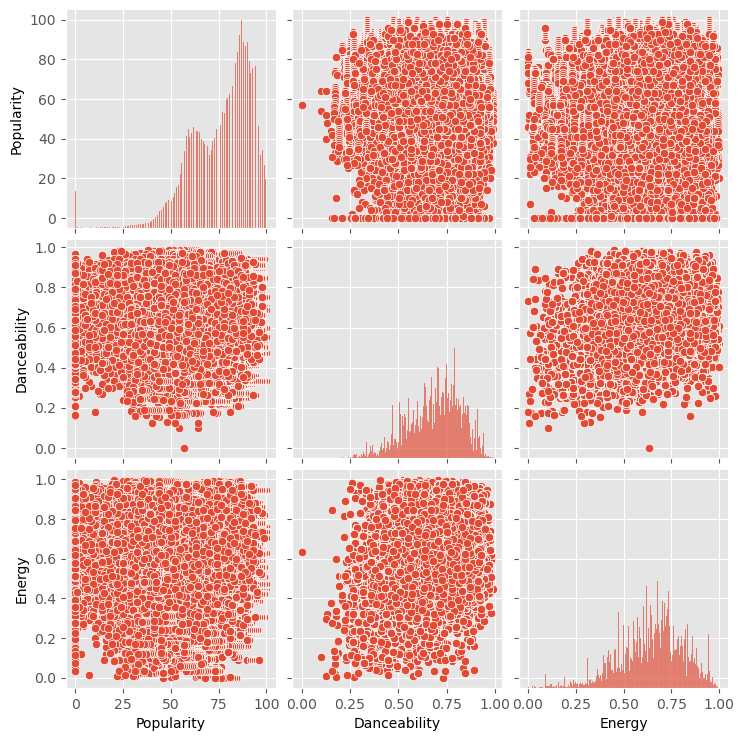

In [21]:
sns.pairplot(data=df[['Popularity','Danceability','Energy']])
plt.show()

**<p style="text-align: center;">From the results above, it appears that there isn't a very strong correlation of a song's popularity with its danceability or energy.**

**<h5>4. Explore the relationship between the explicitness of songs and their popularity.**

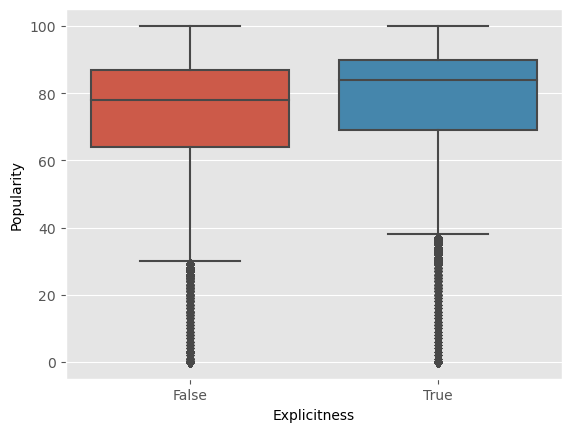

In [22]:
sns.boxplot(x='Explicit', y='Popularity', data=df)
plt.xlabel("Explicitness")
plt.show()  

In [23]:
df.groupby(by='Explicit')['Popularity'].median()

Explicit
False    78.0
True     84.0
Name: Popularity, dtype: float64

**<p style="text-align: center;">From the data above, it can be concluded that songs that are explicit are more popular than the ones that are not, where explicit songs have a median popularity of 84 and non-explicit songs have a median popularity of 78.**

**<h5>5. Analyze the relationship between song features (such as acousticness or instrumentalness) and their popularity.**

First, let us see the correlational matrix of the song features...

In [24]:
df_corr2 = df[['Popularity','Danceability','Energy','Explicit', 'Key', 'Loudness',
       'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo(bpm)']].corr()
df_corr2

,Popularity,Danceability,Energy,Explicit,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo(bpm)
Popularity,1.000000,-0.014830,0.027952,0.114984,0.012617,0.146009,0.105709,-0.155398,-0.077551,-0.029988,-0.040013,-0.003343,0.002269
Danceability,-0.014830,1.000000,0.236999,0.293798,0.005669,0.226960,-0.189010,0.202694,-0.272283,-0.030721,-0.126728,0.393452,-0.170324
Energy,0.027952,0.236999,1.000000,0.131918,0.044966,0.733647,-0.097992,0.049996,-0.534402,-0.070210,0.140633,0.344380,0.097814
Explicit,0.114984,0.293798,0.131918,1.000000,-0.055454,0.141240,-0.073725,0.272746,-0.155002,-0.044031,0.003853,-0.002916,0.003894
Key,0.012617,0.005669,0.044966,-0.055454,1.000000,0.038535,-0.093388,-0.012845,-0.006480,0.023912,-0.040019,0.075637,0.067434
Loudness,0.146009,0.226960,0.733647,0.141240,0.038535,1.000000,-0.059135,-0.008032,-0.436129,-0.215102,0.067208,0.286519,0.033101
Mode,0.105709,-0.189010,-0.097992,-0.073725,-0.093388,-0.059135,1.000000,-0.094749,0.019793,0.017453,-0.001970,-0.089128,0.014843
Speechiness,-0.155398,0.202694,0.049996,0.272746,-0.012845,-0.008032,-0.094749,1.000000,-0.037952,-0.048572,0.023486,0.041125,0.084380
Acousticness,-0.077551,-0.272283,-0.534402,-0.155002,-0.006480,-0.436129,0.019793,-0.037952,1.000000,0.005555,-0.030044,-0.135055,-0.065277
Instrumentalness,-0.029988,-0.030721,-0.070210,-0.044031,0.023912,-0.215102,0.017453,-0.048572,0.005555,1.000000,-0.007393,-0.105626,-0.009660


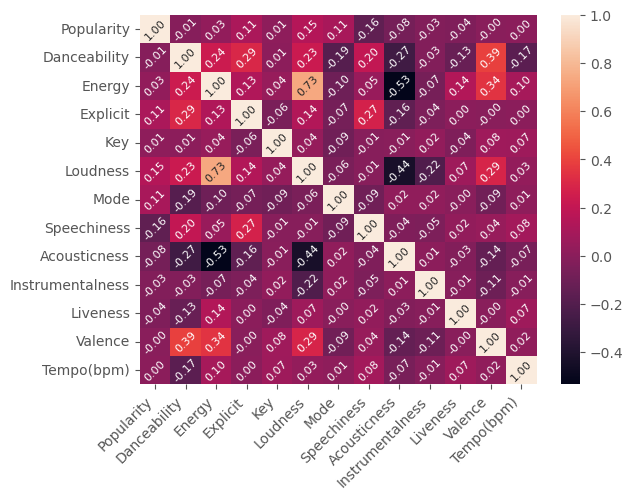

In [25]:
ax = sns.heatmap(df_corr2, annot=True, fmt=".2f", annot_kws={"size": 8, "rotation": 45})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

<p style="text-align: center;">From the heatmap, we can see that <b>Energy and Loudness</b> of a song have a <b>strong positive correlation (0.73)</b> and <b>Energy and Acousticness</b> of a song have a <b>considerably strong negative correlation (-0.53)</b>. These inferences can be confirmed from the plots below along with their best regression fit:

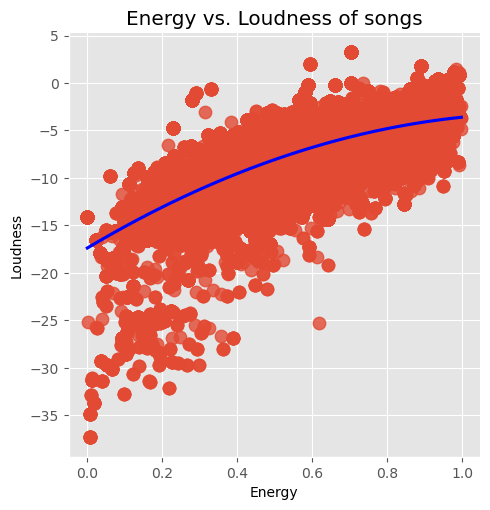

In [26]:
sns.lmplot(data=df, x='Energy', y='Loudness', order=2, ci=None, scatter_kws={"s": 80}, line_kws={"color":"blue"})
plt.title('Energy vs. Loudness of songs')
plt.show()

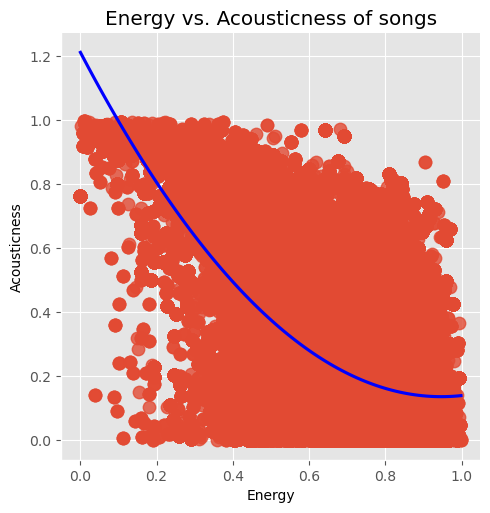

In [27]:
sns.lmplot(data=df, x='Energy', y='Acousticness', order=2, ci=None, scatter_kws={"s": 80}, line_kws={"color":"blue"})
plt.title('Energy vs. Acousticness of songs')
plt.show()

**<h5>6. Compare the top artists in different countries to identify cultural music preferences.**

First, let us see the list of countries for future reference:

In [28]:
countries = df['Country'].unique()
countries

array(['ZA', 'VN', 'VE', 'UY', 'US', 'UA', 'TW', 'TR', 'TH', 'SV', 'SK',
       'SG', 'SE', 'SA', 'RO', 'PY', 'PT', 'PL', 'PK', 'PH', 'PE', 'PA',
       'NZ', 'NO', 'NL', 'NI', 'NG', 'MY', 'MX', 'MA', 'LV', 'LU', 'LT',
       'KZ', 'KR', 'JP', 'IT', 'IS', 'IN', 'IL', 'IE', 'ID', 'HU', 'HN',
       'HK', 'GT', 'GR', 'GB', 'FR', 'FI', 'ES', 'EG', 'EE', 'EC', 'DO',
       'DK', 'DE', 'CZ', 'CR', 'CO', 'CL', 'CH', 'CA', 'BY', 'BR', 'BO',
       'BG', 'BE', 'AU', 'AT', 'AR', 'AE'], dtype=object)

Since we want to find the cultural music preferences in each country, we will order the popularity in each country:

In [29]:
unique_country = df.groupby('Country').apply(lambda x: x.sort_values('Popularity', ascending=False)) \
                .reset_index(drop=True)
unique_country

,Name,Artists,Daily_Rank,Daily_Movement,Weekly_Movement,Country,Popularity,Explicit,Duration(ms),Album_Name,Album_Release_Date,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo(bpm),Time_Signature
0,greedy,Tate McRae,1,1,0,AE,100,True,131872,greedy,2023-09-15,0.750,0.733,6,-3.180,0,0.0319,0.256000,0.000000,0.1140,0.844,111.018,1
1,Espresso,Sabrina Carpenter,1,0,0,AE,100,True,175459,Espresso,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.107000,0.000065,0.1850,0.690,103.969,4
2,Beautiful Things,Benson Boone,6,1,0,AE,100,False,180304,Beautiful Things,2024-01-18,0.472,0.471,10,-5.692,1,0.0603,0.151000,0.000000,0.1400,0.219,105.029,3
3,i like the way you kiss me,Artemas,6,-2,1,AE,100,False,142514,i like the way you kiss me,2024-03-19,0.599,0.946,11,-4.263,1,0.0447,0.000938,0.010600,0.0826,0.747,151.647,4
4,All I Want for Christmas Is You,Mariah Carey,5,1,1,AE,100,False,241106,Merry Christmas,1994-10-28,0.336,0.627,7,-7.463,1,0.0384,0.164000,0.000000,0.0708,0.350,150.273,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968552,Runnin Outta Time,"Future, Metro Boomin",34,16,16,ZA,0,True,205480,WE DON'T TRUST YOU,2024-03-22,0.777,0.463,10,-7.573,0,0.2420,0.231000,0.000004,0.3660,0.180,105.998,4
968553,Fried (She a Vibe),"Future, Metro Boomin",40,10,10,ZA,0,True,210173,WE DON'T TRUST YOU,2024-03-22,0.833,0.688,6,-4.581,0,0.1970,0.002110,0.000000,0.7190,0.375,145.030,4
968554,Everyday Hustle,"Future, Metro Boomin",43,7,7,ZA,0,True,226946,WE DON'T TRUST YOU,2024-03-22,0.557,0.704,6,-5.641,0,0.3900,0.059500,0.000000,0.6760,0.378,179.494,3
968555,Ain't No Love,"Future, Metro Boomin",45,5,5,ZA,0,True,182840,WE DON'T TRUST YOU,2024-03-22,0.754,0.673,9,-6.341,1,0.1310,0.084200,0.000086,0.0841,0.112,147.020,4


Since there are top 50 songs in each country:

In [30]:
N = 50
top_songs = unique_country.groupby('Country').head(N)
top_songs

,Name,Artists,Daily_Rank,Daily_Movement,Weekly_Movement,Country,Popularity,Explicit,Duration(ms),Album_Name,Album_Release_Date,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo(bpm),Time_Signature
0,greedy,Tate McRae,1,1,0,AE,100,True,131872,greedy,2023-09-15,0.750,0.733,6,-3.180,0,0.0319,0.256000,0.000000,0.1140,0.844,111.018,1
1,Espresso,Sabrina Carpenter,1,0,0,AE,100,True,175459,Espresso,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.107000,0.000065,0.1850,0.690,103.969,4
2,Beautiful Things,Benson Boone,6,1,0,AE,100,False,180304,Beautiful Things,2024-01-18,0.472,0.471,10,-5.692,1,0.0603,0.151000,0.000000,0.1400,0.219,105.029,3
3,i like the way you kiss me,Artemas,6,-2,1,AE,100,False,142514,i like the way you kiss me,2024-03-19,0.599,0.946,11,-4.263,1,0.0447,0.000938,0.010600,0.0826,0.747,151.647,4
4,All I Want for Christmas Is You,Mariah Carey,5,1,1,AE,100,False,241106,Merry Christmas,1994-10-28,0.336,0.627,7,-7.463,1,0.0384,0.164000,0.000000,0.0708,0.350,150.273,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955273,greedy,Tate McRae,37,-12,1,ZA,100,True,131872,greedy,2023-09-15,0.750,0.733,6,-3.180,0,0.0319,0.256000,0.000000,0.1140,0.844,111.018,1
955274,i like the way you kiss me,Artemas,14,2,0,ZA,100,False,142514,i like the way you kiss me,2024-03-19,0.599,0.946,11,-4.263,1,0.0447,0.000938,0.010600,0.0826,0.747,151.647,4
955275,i like the way you kiss me,Artemas,11,-6,1,ZA,100,False,142514,i like the way you kiss me,2024-03-19,0.599,0.946,11,-4.263,1,0.0447,0.000938,0.010600,0.0826,0.747,151.647,4
955276,i like the way you kiss me,Artemas,18,-4,-4,ZA,100,False,142514,i like the way you kiss me,2024-03-19,0.599,0.946,11,-4.263,1,0.0447,0.000938,0.010600,0.0826,0.747,151.647,4


Now, we will see the artists from each country with the count of their top songs:

In [31]:
top_artists = top_songs.groupby(['Country', 'Artists']) \
            .size() \
            .reset_index(name='Count')
top_artists

# Change your prefered country name in the 'country' variable below

country = input("`Enter country here: ")

if country not in top_artists['Country'].unique():
    print(f"No data available for country: {country}")

else:

    top_artists = top_artists[top_artists['Country'] == country]

    sns.barplot(data = top_artists, x = 'Count', y = 'Artists', orient = 'h')
    plt.title(f'Top Artists in {country}')
    plt.xlabel('No. of Top Songs')
    plt.ylabel('Artist')
    x_ticks = plt.gca().get_xticks().astype(int)
    plt.xticks(x_ticks, x_ticks)
    plt.show()

# List of Countries

# ['ZA', 'VN', 'VE', 'UY', 'US', 'UA', 'TW', 'TR', 'TH', 'SV', 'SK',
# 'SG', 'SE', 'SA', 'RO', 'PY', 'PT', 'PL', 'PK', 'PH', 'PE', 'PA',
# 'NZ', 'NO', 'NL', 'NI', 'NG', 'MY', 'MX', 'MA', 'LV', 'LU', 'LT',
# 'KZ', 'KR', 'JP', 'IT', 'IS', 'IN', 'IL', 'IE', 'ID', 'HU', 'HN',
# 'HK', 'GT', 'GR', 'GB', 'FR', 'FI', 'ES', 'EG', 'EE', 'EC', 'DO',
# 'DK', 'DE', 'CZ', 'CR', 'CO', 'CL', 'CH', 'CA', 'BY', 'BR', 'BO',
# 'BG', 'BE', 'AU', 'AT', 'AR', 'AE']


No data available for country: 
